In [1]:
# Import data into a pandas dataframe
# Dataset uploaded to Google Drive folder: hid231-hid203 dataset: food_facts.tsv
##############################
# Modules Used:
#-----------------------------
# pandas 
# seaborn
# matplotlib
##############################
import pandas as pd
food_facts = pd.read_csv('food_facts.tsv', sep='\t', low_memory=False)

In [2]:
# data statistics
food_facts.shape

(356027, 163)

In [3]:
# countries with most data
# We shall use these top countries for our analysis and comparisions
from collections import Counter
value_counts = Counter(food_facts.countries_en)
top_counts = value_counts.most_common(30)
top_counts

[('United States', 173159),
 ('France', 123961),
 ('Switzerland', 14932),
 ('Germany', 8470),
 ('Spain', 5529),
 ('United Kingdom', 5092),
 ('Belgium', 2936),
 ('Australia', 2201),
 ('Russia', 1582),
 ('France,Switzerland', 1492),
 ('Italy', 1433),
 ('Canada', 973),
 ('Belgium,France', 759),
 ('Portugal', 738),
 ('Netherlands', 628),
 ('France,United Kingdom', 580),
 ('Austria', 402),
 ('Czech Republic', 399),
 ('Brazil', 356),
 ('Sweden', 341),
 ('Japan', 335),
 ('France,Germany', 325),
 ('France,United States', 296),
 ('Hungary', 290),
 (nan, 275),
 ('Serbia', 273),
 ('Denmark', 271),
 ('France,Spain', 259),
 ('Thailand', 241),
 ('Romania', 235)]

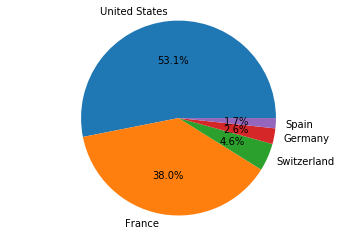

In [4]:
import matplotlib.pyplot as plt

# Top 5 countries

country = []
count = []
for item in top_counts[0:5]:
    country.append(item[0])
    count.append(item[1])

plt.pie(count, labels=country,
        autopct='%1.1f%%')
 
plt.axis('equal')
plt.show()


In [5]:
# Getting the names of top countries and cleaning up the data
top_countries = []
for item in top_counts:
    top_countries.append(item[0])
top_countries.remove('France,Switzerland')
top_countries.remove('Belgium,France')
top_countries.remove('France,United Kingdom')
top_countries.remove('France,Germany')
top_countries.remove('France,United States')
top_countries.remove('France,Spain')

In [6]:
# Final countries for analysis
top_countries.pop(19)
top_countries

['United States',
 'France',
 'Switzerland',
 'Germany',
 'Spain',
 'United Kingdom',
 'Belgium',
 'Australia',
 'Russia',
 'Italy',
 'Canada',
 'Portugal',
 'Netherlands',
 'Austria',
 'Czech Republic',
 'Brazil',
 'Sweden',
 'Japan',
 'Hungary',
 'Serbia',
 'Denmark',
 'Thailand',
 'Romania']

In [7]:
# Filtering the data for top countries
food_countries = food_facts[food_facts['countries_en'].isin(top_countries)]

In [8]:
# Check count of missing values
missing_values_pct = (food_countries.isnull().sum() * 100)/ len(food_facts)

In [9]:
# Remove columns with missing values more than 60 percent
consistent_cols = missing_values_pct[missing_values_pct < 60]
consistent_cols.shape

(42,)

In [10]:
# Including column names only meaningful in analysis
cols_for_analysis = ['product_name','brands','countries_en', 'ingredients_text', 'nutrition_grade_fr',
                     'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
                     'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
                     'sodium_100g', 'nutrition-score-fr_100g']
numeric_cols = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
                     'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
                     'sodium_100g', 'nutrition-score-fr_100g']

In [11]:
# Cleaning up the data
clean_data = food_countries.loc[:, cols_for_analysis]

In [12]:
clean_data = clean_data.rename(columns={'saturated-fat_100g': 'saturated_fat_100g', 'trans-fat_100g': 'trans_fat_100g'})

In [13]:
clean_data.shape

(344777, 17)

In [14]:
# Imputing 0 to null values
clean_data.isnull().sum()
clean_data.fillna(0, inplace=True)

In [15]:
# Analyzing the sugar content in food per 100g
sugar = clean_data.groupby(['countries_en']).mean().sugars_100g

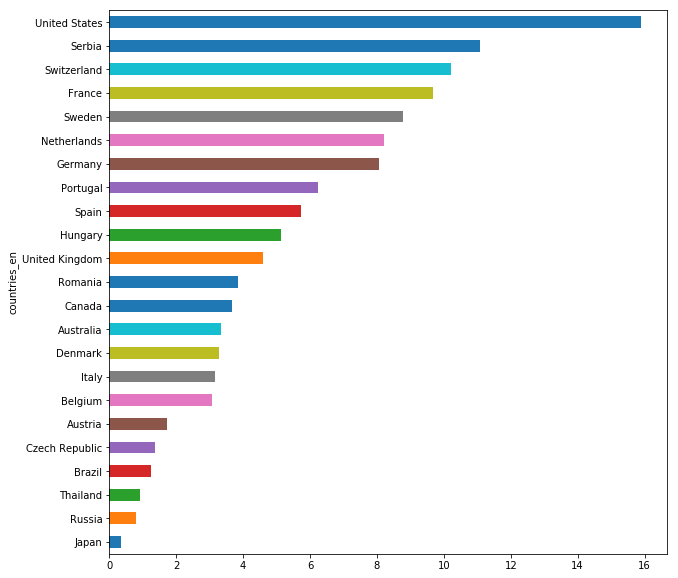

In [16]:
plt.figure(figsize=(10,10))
sugar.sort_values().plot(kind='barh')
plt.show()

In [17]:
food_us = clean_data[clean_data['countries_en'].isin(['United States'])]
food_us.shape

(173159, 17)

In [18]:
# Analyzing the salt content in food
salt = clean_data.groupby(['countries_en']).mean().sodium_100g

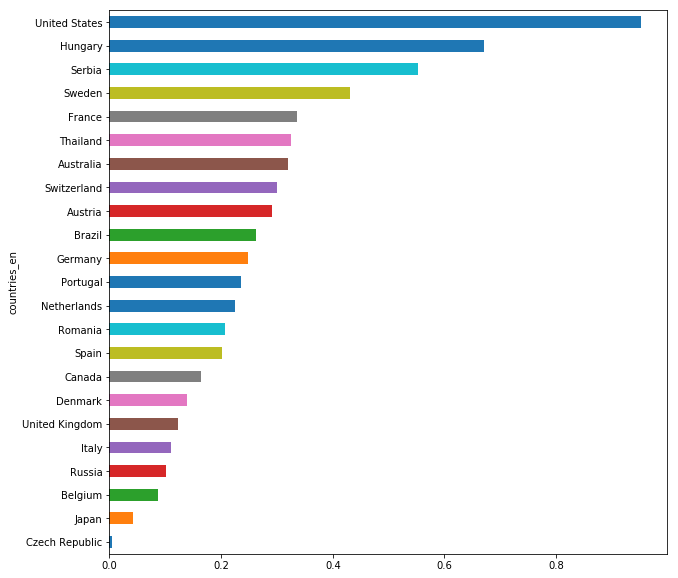

In [19]:
plt.figure(figsize=(10,10))
salt.sort_values().plot(kind='barh')
plt.show()

In [20]:
# Analyzing the fat content in food per 100g
fat = clean_data.groupby(['countries_en']).mean().fat_100g
saturated_fat = clean_data.groupby(['countries_en']).mean().saturated_fat_100g
trans_fat = clean_data.groupby(['countries_en']).mean().trans_fat_100g
cholestrol = clean_data.groupby(['countries_en']).mean().cholesterol_100g

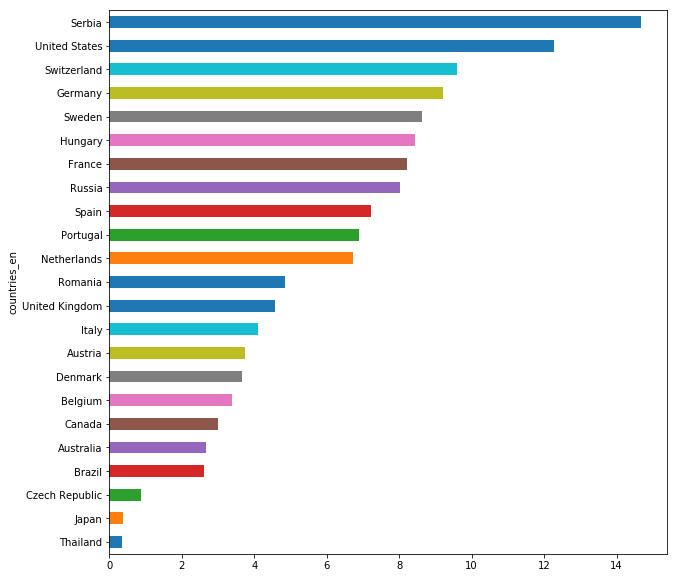

In [21]:
plt.figure(figsize=(10,10))
fat.sort_values().plot(kind='barh')
plt.show()

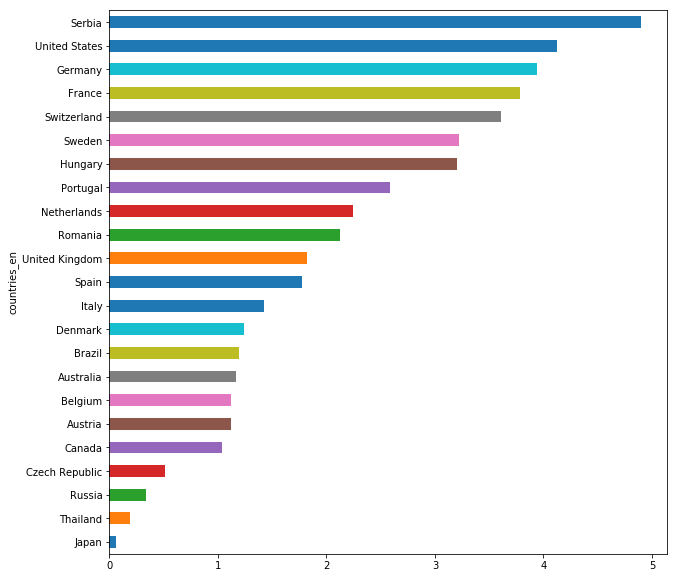

In [22]:
plt.figure(figsize=(10,10))
saturated_fat.sort_values().plot(kind='barh')
plt.show()

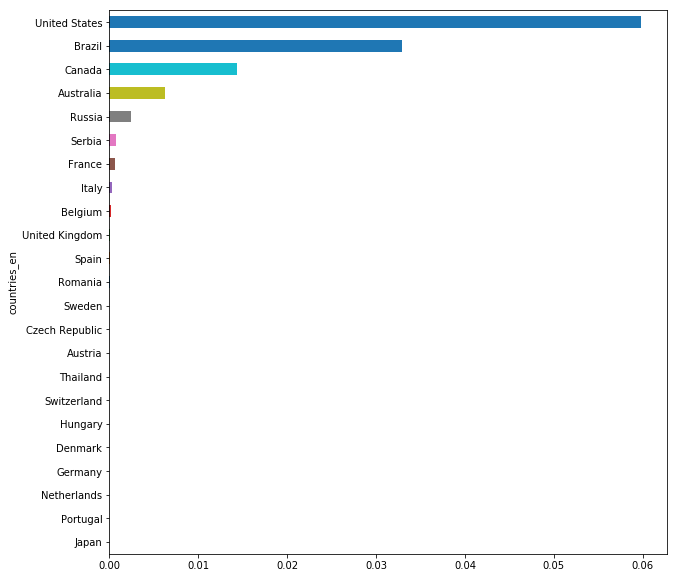

In [23]:
plt.figure(figsize=(10,10))
trans_fat.sort_values().plot(kind='barh')
plt.show()

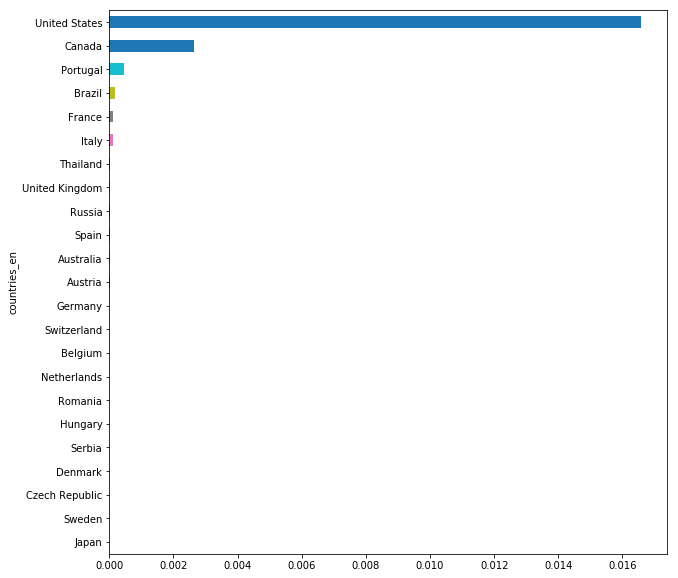

In [24]:
plt.figure(figsize=(10,10))
cholestrol.sort_values().plot(kind='barh')
plt.show()